In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [3]:
df = pd.read_csv('../data/train.csv')
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
df = df.iloc[:1826,:]

In [5]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27


In [6]:
df[['Year', 'Month', 'Day']] = df['date'].str.split('-', expand=True)
df = df.drop(columns='date')

/var/folders/b0/43k3nkrx6vv3qbyw2gh54wd80000gn/T/ipykernel_19509/2692405232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Year', 'Month', 'Day']] = df['date'].str.split('-', expand=True)
/var/folders/b0/43k3nkrx6vv3qbyw2gh54wd80000gn/T/ipykernel_19509/2692405232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Year', 'Month', 'Day']] = df['date'].str.split('-', expand=True)
/var/folders/b0/43k3nkrx6vv3qbyw2gh54wd80000gn/T/ipykernel_19509/2692405232.py:1: SettingWithCopyWarning: 
A value i

In [7]:
df

,store,item,sales,Year,Month,Day
0,1,1,13,2013,01,01
1,1,1,11,2013,01,02
2,1,1,14,2013,01,03
3,1,1,13,2013,01,04
4,1,1,10,2013,01,05
...,...,...,...,...,...,...
1821,1,1,14,2017,12,27
1822,1,1,19,2017,12,28
1823,1,1,15,2017,12,29
1824,1,1,27,2017,12,30


In [8]:
y = df.iloc[:,2].values
df = df.drop(columns='sales')
X = df.iloc[:,:].values

In [9]:
X

array([[1, 1, '2013', '01', '01'],
       [1, 1, '2013', '01', '02'],
       [1, 1, '2013', '01', '03'],
       ...,
       [1, 1, '2017', '12', '29'],
       [1, 1, '2017', '12', '30'],
       [1, 1, '2017', '12', '31']], dtype=object)

In [10]:
y

array([13, 11, 14, ..., 15, 27, 23])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

## Building the model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_predicted = lr.predict(X_test)
y_predicted

array([21.15637362, 21.76314441, 18.60700784, 17.26194431, 19.96979507,
       19.66477831, 17.32597088, 24.83351303, 24.7430723 , 23.44159777,
       17.29955672, 18.29927722, 21.17681119, 18.65385957, 24.36207578,
       20.36198983, 23.6324735 , 21.87075997, 17.65413907, 19.26660696,
       16.85453364, 19.34780836, 19.23095346, 19.97773058, 23.04940302,
       20.7753771 , 22.19370652, 22.14609984, 24.28283329, 21.45812765,
       22.87048047, 18.00872143, 15.75915076, 22.94972296, 21.4197603 ,
       20.95429965, 22.1349016 , 18.36330378, 21.01832621, 24.47893067,
       20.74820799, 23.43039953, 22.53633569, 17.90904137, 18.61222948,
       19.61194998, 22.03522154, 22.00880738, 21.49574005, 21.79151749,
       19.51151498, 21.44617446, 21.63705019, 21.57498254, 21.63303251,
       18.30123613, 18.98800435, 21.3900834 , 15.80796141, 19.44151182,
       23.48322786, 22.172514  , 17.72815991, 17.54326077, 18.80310522,
       20.78135369, 19.96055574, 16.47951371, 18.489398  , 17.95

In [15]:
y_test

array([20, 12, 19, 19, 18, 14, 13,  7, 14, 24, 21, 25, 32, 19, 28, 23, 16,
       23, 18, 25, 18, 25, 21, 12, 21, 19,  4, 26, 20, 33, 16, 27,  9, 25,
       15, 20, 22, 22, 13, 31, 19, 25, 35, 14, 27, 15, 13, 10, 37, 11, 23,
       22, 26, 19, 22, 24, 17, 15, 11, 16, 26, 25, 26, 17, 16,  9, 29, 22,
       15, 11, 20, 12, 17,  9, 14, 16, 25, 28, 14, 17, 25, 39, 29, 13, 22,
       18, 16, 13, 24, 25, 17, 17, 14, 18, 17, 18, 26, 20, 28, 13, 19, 19,
       14, 13, 21, 15, 15, 22, 26, 17, 27,  8, 12, 22, 29, 28, 25, 18, 13,
       24, 17, 22,  8, 24, 15, 13, 15, 33, 24, 19, 19, 18, 29, 26, 15, 22,
       32, 24, 28, 16, 20, 40, 19, 10,  9, 23, 18, 19, 33, 21, 16, 25, 25,
       18, 41, 15, 24, 17, 21, 14, 31, 15, 10, 34, 21, 16, 24, 38, 20, 13,
       20, 34, 17, 12, 10, 36, 14, 15, 20, 21, 14, 14, 18, 22, 17, 23, 20,
        5, 24, 18, 20, 16, 16, 13, 19, 11, 15, 10, 12, 19, 22, 19, 31, 15,
       16, 25, 18, 12, 13, 20, 19, 22, 11, 12, 17, 22, 17, 19, 22, 18, 29,
       17, 22, 24, 21, 21

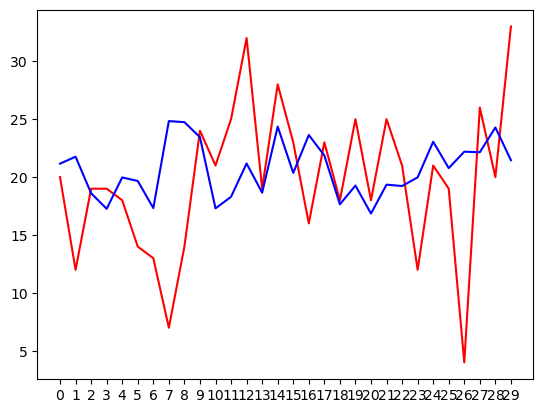

In [16]:
plt.plot(y_test[:30], color="red")
plt.plot(y_predicted[:30], color="blue")
plt.xticks(range(30))
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
mse

41.709491969192726

In [18]:
class Linear_perceptron:
    def __init__(self,learning_rate = 0.01,num_iterations = 100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def fit(self,X,Y):
        num_samples,num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for i in range(self.num_iterations):
            Y_pred = self.predicted(X)
            # print(Y_pred.dtype)
            dw = (1/num_samples)*np.dot(X.T,(Y_pred - Y))
            # print("Subtraction type : ",(Y_pred-Y).dtype)
            db = (1/num_samples)*np.sum(Y_pred - Y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate*db

    def predicted(self,X):
        linear_model = np.dot(X,self.weights)+self.bias
        return linear_model

    def test(self,X):
        global Y_predtest
        Y_predtest = self.predicted(X)
        return Y_predtest


In [19]:
model = Linear_perceptron()
model.fit(X_train,y_train)

In [20]:
y_pred = model.test(X_test)

In [21]:
mse = mean_squared_error(y_test,y_pred)

In [22]:
mse

52.20413143712869

In [23]:
y_pred

array([19.21870824, 18.82751884, 17.133272  , 14.0039527 , 16.98008304,
       17.66033586, 12.95697498, 22.01505113, 22.91357983, 19.81965431,
       12.80852597, 15.61338806, 18.13633674, 16.19934952, 22.17916936,
       16.37061776, 22.08961794, 17.81593489, 13.39448742, 17.03898063,
       13.12109321, 15.87894767, 16.62902736, 16.60552354, 20.42911959,
       18.48429776, 20.8281436 , 17.9565493 , 21.73382231, 19.50777166,
       20.62079699, 13.98044888, 13.78945608, 21.06614404, 16.89768163,
       18.29262037, 19.30042505, 14.56641034, 17.24564265, 21.42908967,
       14.53033197, 21.16353007, 18.95246403, 14.61747333, 14.55857573,
       17.36343783, 19.9374495 , 19.78900048, 18.31234492, 17.37058784,
       14.1949455 , 17.04613064, 19.31609427, 18.75769197, 16.47989374,
       14.00800805, 17.86768247, 17.71854886, 11.25015359, 14.01110271,
       21.4604281 , 18.10499832, 16.41453074, 15.37538762, 16.82853936,
       19.71511827, 16.71857878, 13.61750325, 14.07783491, 16.25

In [24]:
y_test

array([20, 12, 19, 19, 18, 14, 13,  7, 14, 24, 21, 25, 32, 19, 28, 23, 16,
       23, 18, 25, 18, 25, 21, 12, 21, 19,  4, 26, 20, 33, 16, 27,  9, 25,
       15, 20, 22, 22, 13, 31, 19, 25, 35, 14, 27, 15, 13, 10, 37, 11, 23,
       22, 26, 19, 22, 24, 17, 15, 11, 16, 26, 25, 26, 17, 16,  9, 29, 22,
       15, 11, 20, 12, 17,  9, 14, 16, 25, 28, 14, 17, 25, 39, 29, 13, 22,
       18, 16, 13, 24, 25, 17, 17, 14, 18, 17, 18, 26, 20, 28, 13, 19, 19,
       14, 13, 21, 15, 15, 22, 26, 17, 27,  8, 12, 22, 29, 28, 25, 18, 13,
       24, 17, 22,  8, 24, 15, 13, 15, 33, 24, 19, 19, 18, 29, 26, 15, 22,
       32, 24, 28, 16, 20, 40, 19, 10,  9, 23, 18, 19, 33, 21, 16, 25, 25,
       18, 41, 15, 24, 17, 21, 14, 31, 15, 10, 34, 21, 16, 24, 38, 20, 13,
       20, 34, 17, 12, 10, 36, 14, 15, 20, 21, 14, 14, 18, 22, 17, 23, 20,
        5, 24, 18, 20, 16, 16, 13, 19, 11, 15, 10, 12, 19, 22, 19, 31, 15,
       16, 25, 18, 12, 13, 20, 19, 22, 11, 12, 17, 22, 17, 19, 22, 18, 29,
       17, 22, 24, 21, 21

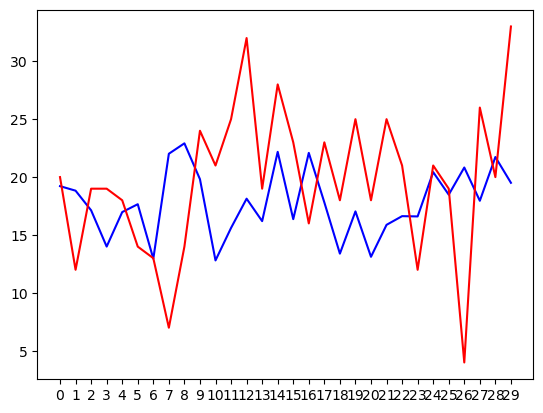

In [25]:
plt.plot(y_pred[:30],color='blue')
plt.plot(y_test[:30],color='red')
plt.xticks(range(30))
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=75)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=75)

In [27]:
y_trial = knn.predict(X_test)
y_trial

array([22.57333333, 18.88      , 17.90666667, 15.77333333, 16.82666667,
       20.41333333, 17.22666667, 20.8       , 22.22666667, 26.12      ,
       17.16      , 21.56      , 24.56      , 22.        , 23.42666667,
       19.56      , 20.50666667, 25.        , 19.09333333, 18.54666667,
       14.82666667, 20.37333333, 21.34666667, 18.        , 25.85333333,
       24.05333333, 19.6       , 24.09333333, 23.32      , 21.32      ,
       22.84      , 20.81333333, 14.68      , 22.48      , 18.17333333,
       21.72      , 25.41333333, 22.21333333, 24.37333333, 21.32      ,
       18.36      , 26.17333333, 24.56      , 18.21333333, 21.92      ,
       20.25333333, 19.32      , 19.72      , 21.04      , 25.42666667,
       23.38666667, 18.45333333, 26.09333333, 20.18666667, 25.72      ,
       17.26666667, 17.69333333, 20.10666667, 15.58666667, 16.53333333,
       26.02666667, 23.81333333, 19.84      , 20.32      , 16.54666667,
       17.88      , 24.44      , 17.04      , 16.34666667, 19.90

In [28]:
mse = mean_squared_error(y_test,y_trial)
mse

30.898281481481483

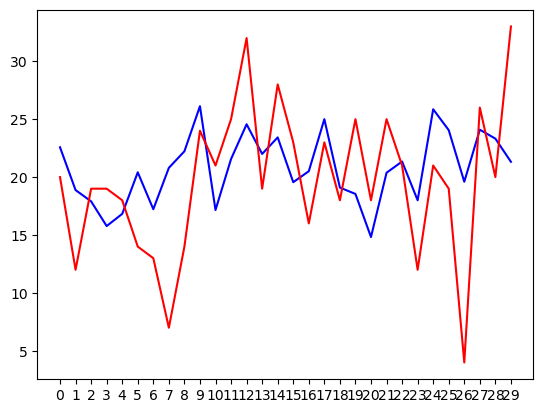

In [29]:
plt.plot(y_trial[:30],color='blue')
plt.plot(y_test[:30],color='red')
plt.xticks(range(30))
plt.show()

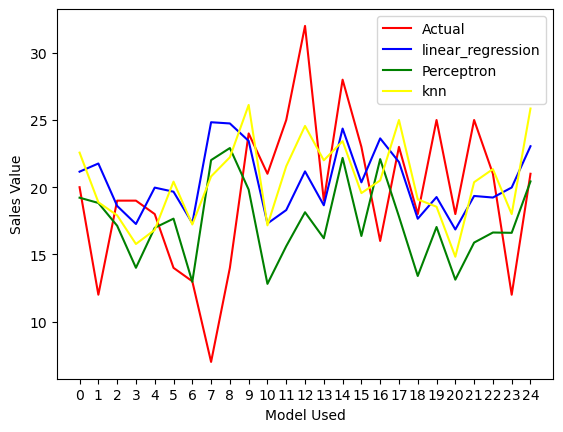

In [30]:
plt.plot(y_test[:25], color="red",label="Actual")
plt.plot(y_predicted[:25], color="blue",label="linear_regression")
plt.plot(y_pred[:25],color='green',label="Perceptron")
plt.plot(y_trial[:25],color='yellow',label="knn")
plt.xticks(range(25))
plt.xlabel("Model Used")
plt.ylabel("Sales Value")
plt.legend()
plt.show()